In [12]:
!pip install datasets
!pip install fsspec==2023.9.2
!pip install xgboost
!pip install hsml
!pip install hopsworks

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.3/170.3 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.4/83.4 kB 13.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 78.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.0/38.0 MB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 108.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 91.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [13]:
from huggingface_hub import notebook_login

notebook_login()

In [4]:
from datasets import load_dataset
import os

os.environ["CURL_CA_BUNDLE"] = ""
ds = load_dataset("jaydxn1/ny_property_listings")
ds.shape

{'train': (1667, 19), 'validation': (417, 19)}

In [5]:
ds['train'].remove_columns(["list_price", "__index_level_0__"]).to_pandas()

,style,city,state,zip_code,beds,full_baths,half_baths,sqft,year_built,list_date,lot_sqft,price_per_sqft,latitude,longitude,stories,hoa_fee,parking_garage
0,3,10,0,11210,4.0,2.0,1.0,1216.0,1910.0,7,2317.0,629.0,40.631851,-73.938186,2.0,0.0,1.0
1,2,10,0,11206,7.0,3.0,0.0,1898.0,1925.0,76,1200.0,1056.0,40.709643,-73.947176,3.0,0.0,0.0
2,3,61,0,10314,3.0,1.0,2.0,1300.0,1977.0,22,1060.0,392.0,40.579288,-74.162369,2.0,377.0,1.0
3,2,9,0,10461,4.0,3.0,0.0,2600.0,1925.0,32,0.0,369.0,40.847630,-73.853923,3.0,0.0,0.0
4,2,10,0,11208,6.0,4.0,0.0,2455.0,1920.0,64,2900.0,468.0,40.681073,-73.884655,3.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,2,10,0,11236,3.0,3.0,0.0,1840.0,1955.0,12,2000.0,394.0,40.629753,-73.900913,2.0,0.0,0.0
1663,3,61,0,10304,2.0,1.0,1.0,2400.0,1989.0,56,6383.0,479.0,40.588259,-74.108609,2.0,0.0,0.0
1664,1,8,0,11435,2.0,1.0,1.0,900.0,1959.0,29,0.0,328.0,40.710695,-73.814299,1.0,1143.0,0.0
1665,1,24,0,11354,2.0,1.0,0.0,949.0,1960.0,41,0.0,357.0,40.766727,-73.826424,1.0,1036.0,0.0


In [ ]:
# from xgboost import XGBRegressor
# # The following options are important because they enable the usage of
# #   categorical features: (tree_method="gpu_hist", enable_categorical=True).
# #   (reference: https://xgboost.readthedocs.io/en/stable/tutorials/categorical.html)

# # Create temporary xgb regressor model:
# temp_model = XGBRegressor(tree_method = "hist", device = "cuda", enable_categorical=True)

# # Perform Grid Search to find optimal hyperparameters:
# from sklearn.model_selection import GridSearchCV

# # Set up search grid
# param_grid = {"max_depth":    [4, 6, 8, 10],
#               "n_estimators": [500, 3000, 5000],
#               "learning_rate": [0.01, 1e-3, 1e-5]} # This was done more properly, this is mainly an exmaple

# # Try out every combination of the grid's values
# search = GridSearchCV(temp_model, param_grid, cv=5).fit(ds['train'].remove_columns(["list_price", "__index_level_0__"]).to_pandas(), ds['train'].select_columns("list_price").to_pandas())

# print("The best hyperparameters are ",search.best_params_)


In [6]:
from xgboost import XGBRegressor

# Initialize XGBOOST Regressor and use GridSearch's recommended hyperparameter values
xgb_model = XGBRegressor(tree_method = "hist", device = "cuda",
                     enable_categorical=True,
                     learning_rate = 0.01,
                     n_estimators  = 5000,
                     max_depth     = 4
                     )

In [7]:
# Train XGB Regressor
xgb_model.fit(ds['train'].remove_columns(["list_price", "__index_level_0__"]).to_pandas(), ds['train'].select_columns("list_price").to_pandas())

# Generate training score
train_score = xgb_model.score(ds['train'].remove_columns(["list_price", "__index_level_0__"]).to_pandas(), ds['train'].select_columns("list_price").to_pandas())
print("Training score: ", train_score)

Training score:  0.9998502022909348


Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.



In [8]:
# Let the model predict on the test data
xgb_Y_pred = xgb_model.predict(ds['validation'].remove_columns(["list_price", "__index_level_0__"]).to_pandas())

# Generate test score
test_score = xgb_model.score(ds['validation'].remove_columns(["list_price", "__index_level_0__"]).to_pandas(), ds['validation'].select_columns("list_price").to_pandas())
print("Test score: ", test_score)

Test score:  0.9960687650442166


In [9]:
import pandas as pd

xgb_df = pd.DataFrame()
xgb_df['Target']=ds['validation'].select_columns("list_price").to_pandas()
xgb_df['Prediction']=xgb_Y_pred

xgb_df['pred_Diff_']=xgb_df['Prediction']-xgb_df['Target']
xgb_df['pred_MAPE_']=(xgb_df['Prediction']-xgb_df['Target'])/xgb_df['Target']
xgb_df['pred_MAE']=xgb_df['pred_Diff_'].abs()
xgb_df['pred_MAPE']=xgb_df['pred_MAPE_'].abs()

print('_____XGBOOST REGRESSOR_____')
print('MAE: {}'.format(xgb_df['pred_MAE'].mean()))
print('MAPE: {}'.format(xgb_df['pred_MAPE'].mean()))

_____XGBOOST REGRESSOR_____
MAE: 17637.26836031175
MAPE: 0.022068639721045325


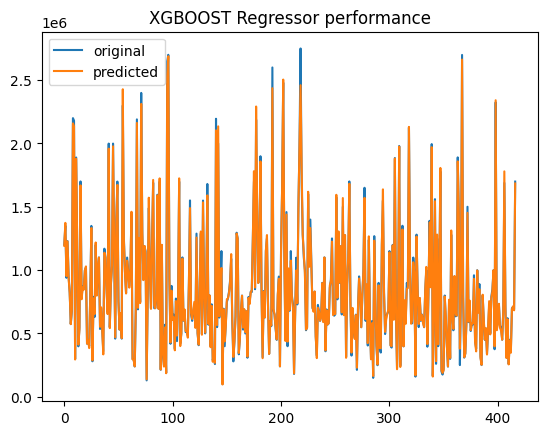

In [10]:
import matplotlib.pyplot as plt

x_ax = range(len(ds['validation'].select_columns("list_price").to_pandas()))
plt.plot(x_ax, ds['validation'].select_columns("list_price").to_pandas(), label="original")
plt.plot(x_ax, xgb_Y_pred, label="predicted")
plt.title("XGBOOST Regressor performance")
plt.legend()
plt.show()

In [2]:
import hopsworks

project = hopsworks.login()

Copy your Api Key (first register/login): https://c.app.hopsworks.ai/account/api/generated

Paste it here: ··········
Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/197787


In [11]:
import os
import joblib
from hsml.schema import Schema
from hsml.model_schema import ModelSchema

# fs is a reference to the Hopsworks Feature Store
fs = project.get_feature_store()

# Create an object for the Hopsworks model registry
mr = project.get_model_registry()

# Create a directory in which the model is saved
model_dir = "xgboost_model"
if os.path.isdir(model_dir) == False:
    os.mkdir(model_dir)
joblib.dump(xgb_model, model_dir + "/xgboost_model.pkl")


# Create a schema for the model which specifies the input (=X_train) and output (=y_train) data
input_schema = Schema(ds['train'].remove_columns(["list_price", "__index_level_0__"]).to_pandas())
output_schema = Schema(ds['train'].select_columns("list_price").to_pandas())
model_schema = ModelSchema(input_schema, output_schema)

# Create an entry for the model in the model registry
xgboost_model = mr.python.create_model(
  name="xgboost_model",
  version=3,
  metrics={"MAE":xgb_df['pred_MAE'].mean(), "MAPE":xgb_df['pred_MAPE'].mean()},
  model_schema=model_schema,
  description="XGBOOST Regressor on Stockholm apartment sales data"
)

# Upload the model to the model registry
xgboost_model.save(model_dir)


Connected. Call `.close()` to terminate connection gracefully.
Connected. Call `.close()` to terminate connection gracefully.


  0%|          | 0/6 [00:00<?, ?it/s]

Uploading: 0.000%|          | 0/7963808 elapsed<00:00 remaining<?

Uploading: 0.000%|          | 0/1381 elapsed<00:00 remaining<?

Model created, explore it at https://c.app.hopsworks.ai:443/p/197787/models/xgboost_model/3


Model(name: 'xgboost_model', version: 3)